In [1]:
%run Functions.ipynb
import matplotlib
import shapely
from shapely.geometry import Polygon
from scipy.interpolate import Rbf
pd.options.mode.chained_assignment = None
from matplotlib.path import Path
import math

In [2]:
names=pd.read_csv('elevation.csv')

Log_dict={'Rw':.0474,
          'm':1,
          'n':2,
          'a':2}

#look up table
lookup_table=pd.read_csv('Log_analysis.csv')
names

,Name,Elevation,Top,Bottom
0,bettge1,237,8032,8053
1,bettge2,243,8074,8086
2,bettge3,224,7987,8007
3,bettge4,226,8011,8022
4,bettge5,206,7989,7993
5,bettge6,245,8040,8047
6,brandt1,254,8088,8096
7,brandt2,245,8092,8098
8,brandt3,252,8111,8119
9,arnold1,226,7994,8006


In [3]:
name='warwas1'
df=pd.read_csv('logs/'+name+'.csv')
if name == 'brandt3':
    df.columns=['DEPT', 'GR', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
    df['SP']=None
else:
    df.columns=['DEPT', 'GR', 'SP', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']

In [4]:
# triple_combo_plot(df, df.DEPT.min(),df.DEPT.max(),name,save=False)

In [5]:
df_payzone=log_calculation(df,name)
df_payzone

,DEPT,GR,SP,LL8,ILM,ILD,DPHI,NPHI,Csh,phiss,Rss,Sw
84,7982.0,123.425271,-0.444739,3.420860,3.223617,2.813181,0.042366,0.353341,1.185452,0.163990,3.478937,0.407636
85,7982.5,122.813473,-1.589220,4.030584,3.367603,3.013131,0.014746,0.370763,1.176320,0.272189,2.390881,0.381672
86,7983.0,122.589304,-2.738075,4.526316,3.647226,3.524485,0.006890,0.367964,1.172975,0.307999,1.432567,0.463524
87,7983.5,117.743184,-4.134371,5.265295,4.166681,4.386692,0.024874,0.363952,1.100645,0.399886,0.664012,0.597514
88,7984.0,103.891505,-6.909537,7.396745,5.068667,5.685473,0.054480,0.360193,0.893903,0.556345,-0.801605,NaN
89,7984.5,85.846131,-12.366169,11.586210,6.574259,8.048506,0.087579,0.291880,0.624569,0.202673,-4.120090,NaN
90,7985.0,69.799875,-21.191927,16.699615,8.731017,11.084179,0.124969,0.257559,0.385073,0.194813,-14.446771,NaN
91,7985.5,57.013500,-31.843433,19.449298,11.241757,13.644575,0.167726,0.220434,0.194231,0.195100,127.638933,0.061700
92,7986.0,47.629485,-42.271492,20.219063,13.369837,15.278689,0.206001,0.185811,0.054171,0.197027,20.222610,0.154249
93,7986.5,41.725174,-50.432240,21.391653,14.138684,15.912090,0.229220,0.173681,-0.033953,0.202376,13.868674,0.183784


In [6]:
# make_probability_distribution_plots(df_payzone,name,save=True,plot=False)

In [7]:
all_df=pd.DataFrame()
for name in names['Name']:
    df=pd.read_csv('logs/'+name+'.csv')
    if name == 'brandt3':
        df.columns=['DEPT', 'GR', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
        df['SP']=None
    else:
        df.columns=['DEPT', 'GR', 'SP', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
    df_payzone=log_calculation(df,name)
    all_df=pd.concat([all_df,df_payzone])

Text(0.5, 1.0, 'Sw Cumulative Distribution')

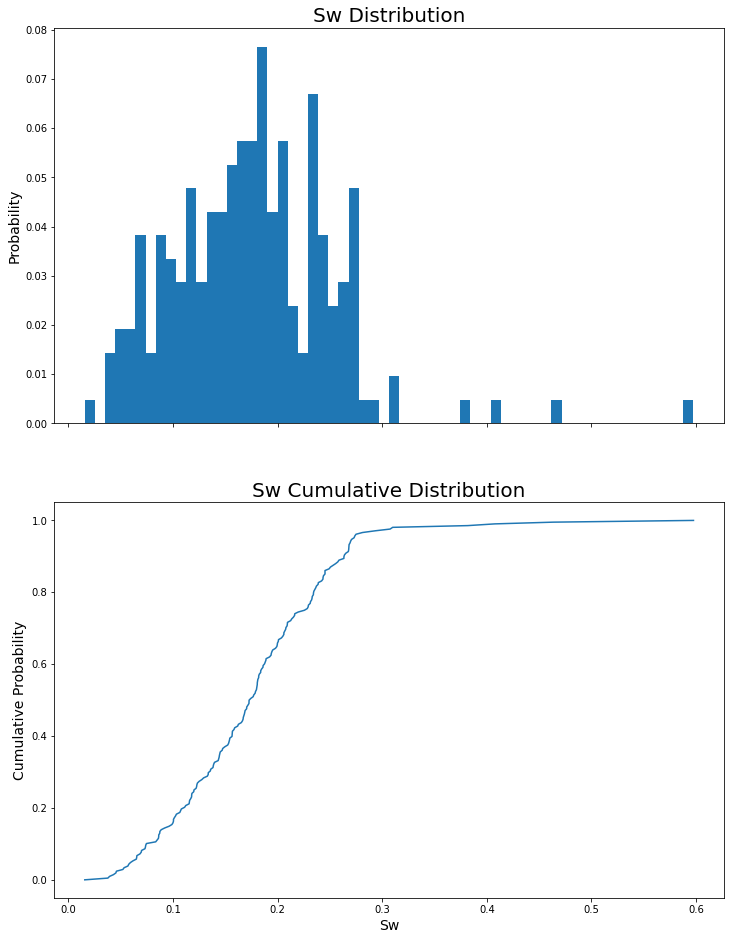

In [8]:
Sw=all_df.Sw.dropna().to_numpy()
weights = np.ones_like(Sw) / (len(Sw))

fig,axes=plt.subplots(2,1,figsize=(12,16),sharex=True)
axes[0].hist(Sw, bins=60,weights=weights)

axes[0].set_ylabel('Probability',fontsize=14)
axes[0].set_title("Sw Distribution",fontsize=20)

Sw_sorted = np.sort(Sw)

# calculate the proportional values of samples
p = 1. * np.arange(len(Sw)) / (len(Sw) - 1)

axes[1].plot(Sw_sorted,p)
axes[1].set_xlabel('Sw',fontsize=14)
axes[1].set_ylabel('Cumulative Probability',fontsize=14)
axes[1].set_title("Sw Cumulative Distribution",fontsize=20)

# plt.savefig('/Users/Ben 1/Senior_Design/probability_distribution/Sw.png', 
#             dpi=200, bbox_inches = "tight",
#             format='png')

Text(0.5, 1.0, 'Porosity Cumulative Distribution')

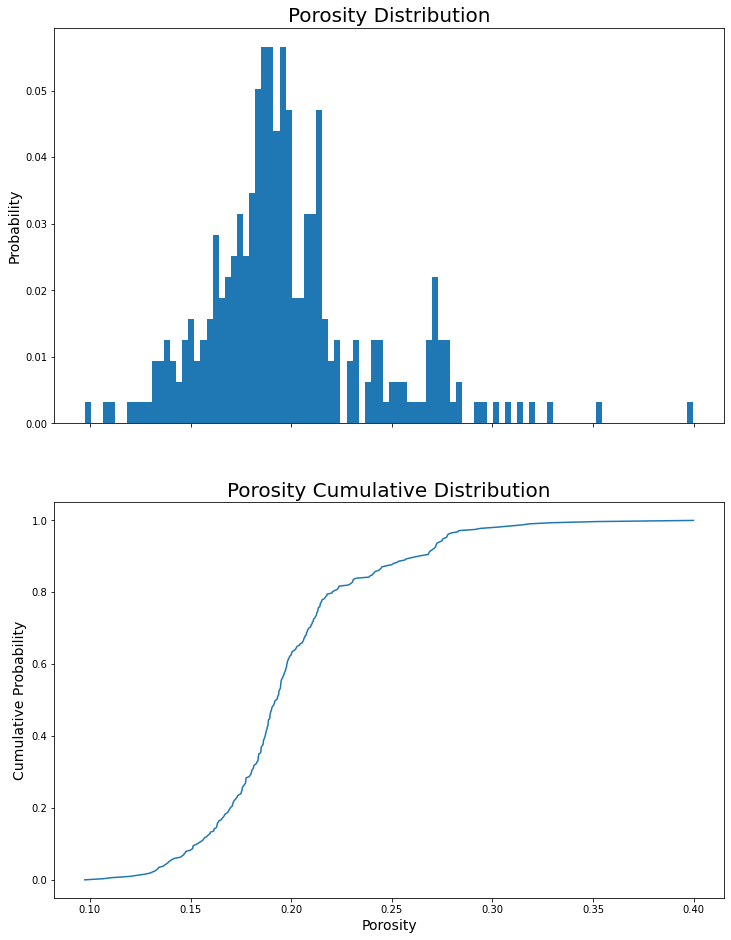

In [9]:
Phi=all_df.phiss.dropna().to_numpy()
Phi = [i for i in Phi if i<=.5]
weights = np.ones_like(Phi) / (len(Phi))

fig,axes=plt.subplots(2,1,figsize=(12,16),sharex=True)
axes[0].hist(Phi, bins=100,weights=weights)

axes[0].set_ylabel('Probability',fontsize=14)
axes[0].set_title("Porosity Distribution",fontsize=20)

Phi_sorted = np.sort(Phi)

# calculate the proportional values of samples
p = 1. * np.arange(len(Phi_sorted)) / (len(Phi_sorted) - 1)

axes[1].plot(Phi_sorted,p)
axes[1].set_xlabel('Porosity',fontsize=14)
axes[1].set_ylabel('Cumulative Probability',fontsize=14)
axes[1].set_title("Porosity Cumulative Distribution",fontsize=20)


# plt.savefig('/Users/Ben 1/Senior_Design/probability_distribution/Phi.png', 
#             dpi=200, bbox_inches = "tight",
#             format='png')


In [10]:
temp_dict={'Percentile':[10,50,90],
           'Sw':[np.percentile(Sw,10),np.percentile(Sw,50),np.percentile(Sw,90)],
           'Phi':[np.percentile(Phi,10),np.percentile(Phi,50),np.percentile(Phi,90)]}
pd.DataFrame(temp_dict).to_csv('Sw_Phi_percentile_table.csv')
pd.DataFrame(temp_dict)

,Percentile,Sw,Phi
0,10,0.074397,0.153260
1,50,0.172703,0.192440
2,90,0.263439,0.262773


In [11]:
df=pd.read_csv('Contour_data.csv')
df['x']=df['x']*1000;df['y']=df['y']*1000
df['thickness']=df.apply(lambda row:  
                     (names[names.Name==row['Name']]['Bottom'].values-
                     names[names.Name==row['Name']]['Top'].values)[0]
                     if row['Name'] in names['Name'].to_list() else None,
                     axis=1)

df['Top'] = df.apply(lambda row:  names[names.Name==row['Name']]['Top'].values[0]
                      if row['Name'] in names['Name'].to_list() else None, axis=1)

df['Bottom'] = df.apply(lambda row:  names[names.Name==row['Name']]['Bottom'].values[0]
                      if row['Name'] in names['Name'].to_list() else None, axis=1)

df['Elevation'] = df.apply(lambda row:  names[names.Name==row['Name']]['Elevation'].values[0]
                      if row['Name'] in names['Name'].to_list() else None, axis=1)

x=np.arange(-5000,4000,5)
y=np.arange(-3000,6100,5)
xx,yy=np.meshgrid(x,y)

In [12]:
df_1=df.copy()
df_1['thickness']=df_1['thickness'].fillna(0)
df_contour1=df_1[~df_1.Name.isin(['hawn1','drapalla','gas_well','bettge5'])]

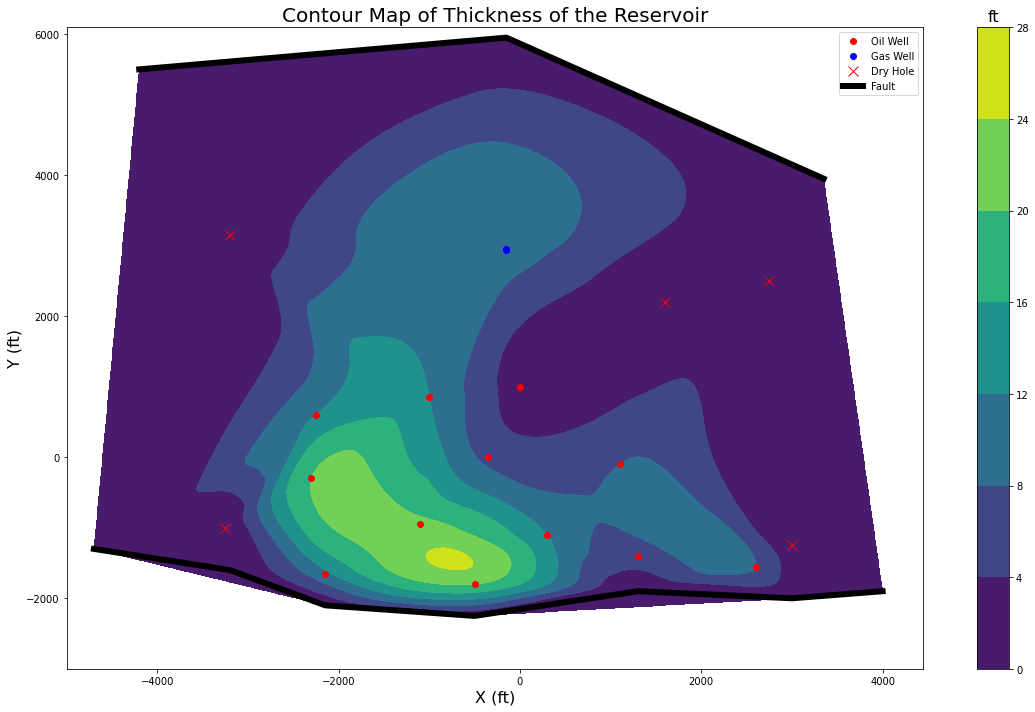

In [13]:
dat=griddata((df_contour1['x'],df_contour1['y']),
             df_contour1['thickness'],(xx,yy),method='cubic')
dat=np.where(dat <0, 0, dat)
fig,ax=plt.subplots(figsize=(16,10))
ct=ax.contourf(xx,yy,dat,levels=6)

# norm= matplotlib.colors.Normalize(vmin=ct.cvalues.min(), vmax=ct.cvalues.max())
# sm = plt.cm.ScalarMappable(norm=norm, cmap = ct.cmap)
# sm.set_array([])
# cbar=fig.colorbar(sm, ticks=ct.levels)

cbar=fig.colorbar(ct)

ax.plot(df_contour1[~(df_contour1.Name.str.contains('fault|dry'))]['x'],
        df_contour1[~df_contour1.Name.str.contains('fault|dry')]['y'],
        'ro',label='Oil Well')

ax.plot(df_1[df_1.Name=='gas_well']['x'],
        df_1[df_1.Name=='gas_well']['y'],
        'bo',label='Gas Well')

ax.plot(df_1[df_1.Name=='dry_hole']['x'],
        df_1[df_1.Name=='dry_hole']['y'],
        'rx',markersize=10,label='Dry Hole')

ax.plot(df_1[df_1.Name.str.contains('upper')]['x'],
        df_1[df_1.Name.str.contains('upper')]['y'],'-',
        c='black',linewidth=6)

ax.plot(df_1[df_1.Name.str.contains('lower')]['x'],
        df_1[df_1.Name.str.contains('lower')]['y'],'-',
        c='black',linewidth=6,
        label='Fault')

ax.legend()
cbar.ax.set_title('ft', fontsize=16)
ax.set_xlabel('X (ft)', fontsize=16)
ax.set_ylabel('Y (ft)', fontsize=16)
ax.set_title('Contour Map of Thickness of the Reservoir',fontsize=20)
plt.tight_layout()

# fig.savefig('/Users/Ben 1/Senior_Design/contour/contour1.png', 
#             dpi=200, bbox_inches = "tight",
#             format='png')

2601.0964788654082


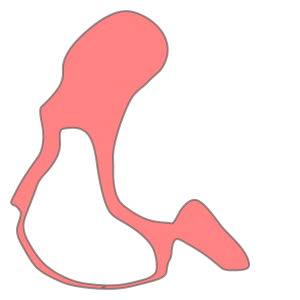

In [14]:
loop=ct.allsegs[2]
x=loop[0][:,0];y=loop[0][:,1]
pgon = Polygon(zip(x, y))
print(max(x))
pgon

𝑂𝑂𝐼𝑃=(𝑉_𝑏 𝜙(1−𝑆_𝑤 ))/𝐵_𝑜 

ϕ is the average porosity and Sw is the average water saturation in your reservoir intervals

Vb is the bulk reservoir volume

Bo is the oil formation volume factor (taken from the PVT data at the initial reservoir pressure)


In [15]:
count=1
Volume=0
Area=[]
#calculate the cum. Area of each layer
for loop in ct.allsegs[1:]: #index 0 is where dry holes are located, therefore skip
    x=loop[0][:,0];y=loop[0][:,1]
    pgon = Polygon(zip(x, y)) 
#     Volume+=pgon.area*(ct.levels[count]+ct.levels[count+1])/2
    Area.append(pgon.area)
    count+=1
Area.reverse()
Area=np.cumsum(Area)

for i in range(len(Area)-1):
    #trapezoidal mehtod
    Volume+= (Area[i]+Area[i+1])/2*4  # 4ft is the step size of each level
    
sw=np.mean(Sw)
phi=np.mean(Phi)
Bo=1.349
Vb=Volume
OOIP=(Vb*phi*(1-sw)/Bo)/5.615 # Ft3 to bbl conversion factor
print('OOIP is '+ str(round(OOIP)) +' bbl ')

OOIP is 3765157 bbl 


Plot the top of the reservoir to see how the reservoir is dipping

In [ ]:
df_contour2=df_contour1.dropna()

dat=griddata((df_contour2['x'],df_contour2['y']),
             df_contour2['Top'] - df_contour2['Elevation'],
             (xx,yy),
            method='cubic')

xflat=np.ndarray.flatten(xx)
yflat=np.ndarray.flatten(yy)
values=np.ndarray.flatten(dat)
df1=pd.DataFrame({"x":xflat,"y":yflat,"values":values})
df1.dropna(inplace=True)
xfixed=df1["x"].values
yfixed=df1["y"].values
xfixed.shape=(len(xfixed),1)
yfixed.shape=(len(yfixed),1)
points=np.concatenate((xfixed,yfixed),axis=1)
values=df1["values"]
dat=griddata(points,values,(xx,yy),method='nearest')

fig,ax=plt.subplots(figsize=(16,10))
cmap=plt.cm.get_cmap('viridis').reversed()
ct=ax.contourf(xx,yy,dat,level=20,cmap=cmap)

contour_coord=ct.allsegs[0][0]

cbar=fig.colorbar(ct)
cbar.ax.invert_yaxis()

ax.plot(df_contour1[~(df_contour1.Name.str.contains('fault|dry'))]['x'],
        df_contour1[~df_contour1.Name.str.contains('fault|dry')]['y'],
        'ro',label='Oil Well')

ax.plot(df_1[df_1.Name=='gas_well']['x'],
        df_1[df_1.Name=='gas_well']['y'],
        'bo',label='Gas Well')

ax.plot(df_1[df_1.Name=='dry_hole']['x'],
        df_1[df_1.Name=='dry_hole']['y'],
        'rx',markersize=10,label='Dry Hole')

ax.plot(df_1[df_1.Name.str.contains('upper')]['x'],
        df_1[df_1.Name.str.contains('upper')]['y'],'-',
        c='black',linewidth=6)

ax.plot(df_1[df_1.Name.str.contains('lower')]['x'],
        df_1[df_1.Name.str.contains('lower')]['y'],'-',
        c='black',linewidth=6,
        label='Fault')

ax.legend()
cbar.ax.set_title('ft', fontsize=16)
ax.set_xlabel('X (ft)', fontsize=16)
ax.set_ylabel('Y (ft)', fontsize=16)
ax.set_title('Contour Map of the Top of the Reservoir',fontsize=20)




plt.plot(contour_coord[:,0],contour_coord[:,1],color='r')
plt.tight_layout()
fig.savefig('/Users/Ben 1/Senior_Design/contour/Top_of_reservoir.png', 
            dpi=200, bbox_inches = "tight",
            format='png')

Plot thickness map without the gas cap (approximation)

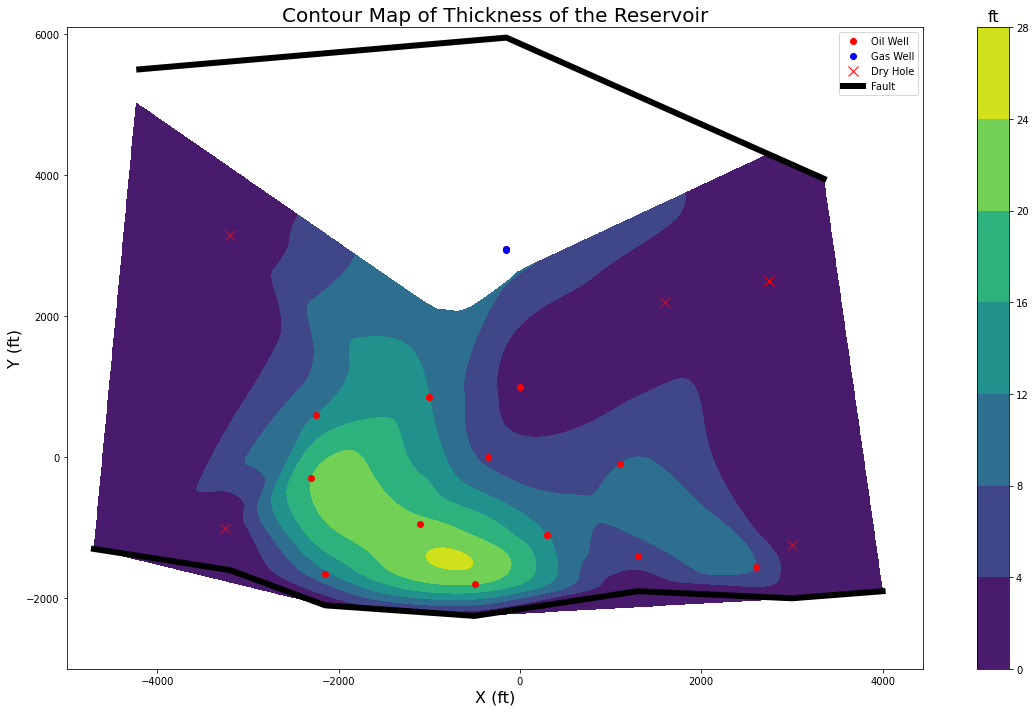

In [18]:
# dat=griddata((df_contour1['x'],df_contour1['y']),
#              df_contour1['thickness'],(xx,yy),method='cubic')
# dat=np.where(dat <0, 0, dat)

# m,n=dat.shape
# for x in range(m):
#     for y in range(n):
#         if ~np.isnan(dat[x,y]):
#             if y-2.3*(x)<=-7000:
#                 dat[x,y]=0
#cutting out
ax.plot(contour_coord[:,0],contour_coord[:,1],color='r')
xylists=[[]for _ in range(len(contour_coord[:,0]))]
for i in range(len(contour_coord[:,0])):
    xylists[i]=[contour_coord[:,0][i],contour_coord[:,1][i]]
path=Path(xylists,closed=True)
xflat.shape=(3276000 ,1)
yflat.shape=(3276000 ,1)
Allpoints=np.concatenate((xflat,yflat),axis=1)
mask=path.contains_points(Allpoints)
mask.shape=dat.shape
dat[mask]=np.nan
           

fig,ax=plt.subplots(figsize=(16,10))
ct=ax.contourf(xx,yy,dat,levels=6)

cbar=fig.colorbar(ct)


ax.plot(df_contour1[~(df_contour1.Name.str.contains('fault|dry'))]['x'],
        df_contour1[~df_contour1.Name.str.contains('fault|dry')]['y'],
        'ro',label='Oil Well')

ax.plot(df_1[df_1.Name=='gas_well']['x'],
        df_1[df_1.Name=='gas_well']['y'],
        'bo',label='Gas Well')

ax.plot(df_1[df_1.Name=='dry_hole']['x'],
        df_1[df_1.Name=='dry_hole']['y'],
        'rx',markersize=10,label='Dry Hole')

ax.plot(df_1[df_1.Name.str.contains('upper')]['x'],
        df_1[df_1.Name.str.contains('upper')]['y'],'-',
        c='black',linewidth=6)

ax.plot(df_1[df_1.Name.str.contains('lower')]['x'],
        df_1[df_1.Name.str.contains('lower')]['y'],'-',
        c='black',linewidth=6,
        label='Fault')


ax.legend()
cbar.ax.set_title('ft', fontsize=16)
ax.set_xlabel('X (ft)', fontsize=16)
ax.set_ylabel('Y (ft)', fontsize=16)
ax.set_title('Contour Map of Thickness of the Reservoir',fontsize=20)
plt.tight_layout()

# fig.savefig('/Users/Ben 1/Senior_Design/contour/contour1.png', 
#             dpi=200, bbox_inches = "tight",
#             format='png')


In [19]:
### Recalculate OOIP without the gas cap
count=1
Volume=0
Area=[]
#calculate the cum. Area of each layer
for loop in ct.allsegs[1:]: #index 0 is where dry holes are located, therefore skip
    x=loop[0][:,0];y=loop[0][:,1]
    pgon = Polygon(zip(x, y)) 
#     Volume+=pgon.area*(ct.levels[count]+ct.levels[count+1])/2
    Area.append(pgon.area)
    count+=1
Area.reverse()
Area=np.cumsum(Area)

for i in range(len(Area)-1):
    #trapezoidal mehtod
    Volume+= (Area[i]+Area[i+1])/2*4  # 4ft is the step size of each level
      
sw=np.mean(Sw)
phi=np.mean(Phi)
Bo=1.349
Vb=Volume
OOIP=(Vb*phi*(1-sw)/Bo)/5.615 # Ft3 to bbl conversion factor
print('OOIP is '+ str(round(OOIP)) +' bbl ')

OOIP is 3072149 bbl 


In [20]:
# #### Plotting the bottom of the reservoir 

# df_contour2=df_contour1.dropna()

# dat=griddata((df_contour2['x'],df_contour2['y']),df_contour2['Bottom']-df_contour2['Elevation'],(xx,yy),method='cubic')
# dat=np.where(dat <0, 0, dat)
# fig,ax=plt.subplots(figsize=(16,8))
# cmap=plt.cm.get_cmap('viridis').reversed()
# ct=ax.contourf(xx,yy,dat,cmap=cmap)


# cbar=fig.colorbar(ct)
# cbar.ax.invert_yaxis()

# ax.plot(df_contour1[~(df_contour1.Name.str.contains('fault|dry'))]['x'],
#         df_contour1[~df_contour1.Name.str.contains('fault|dry')]['y'],
#         'ro',label='Oil Well')

# ax.plot(df_1[df_1.Name=='gas_well']['x'],
#         df_1[df_1.Name=='gas_well']['y'],
#         'bo',label='Gas Well')

# ax.plot(df_1[df_1.Name=='dry_hole']['x'],
#         df_1[df_1.Name=='dry_hole']['y'],
#         'rx',markersize=10,label='Dry Hole')

# ax.plot(df_1[df_1.Name.str.contains('upper')]['x'],
#         df_1[df_1.Name.str.contains('upper')]['y'],'-',
#         c='black',linewidth=6)

# ax.plot(df_1[df_1.Name.str.contains('lower')]['x'],
#         df_1[df_1.Name.str.contains('lower')]['y'],'-',
#         c='black',linewidth=6,
#         label='Fault')

# ax.legend()
# cbar.ax.set_title('ft', fontsize=16)
# ax.set_xlabel('X (ft)', fontsize=16)
# ax.set_ylabel('Y (ft)', fontsize=16)
# ax.set_title('Contour Map of the Bottom of the Reservoir',fontsize=20)
# plt.tight_layout()